In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anixlynch","key":"7acabe08caede2953efae6170c77a478"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d hojjatk/mnist-dataset


Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
 41% 9.00M/22.0M [00:00<00:00, 93.7MB/s]
100% 22.0M/22.0M [00:00<00:00, 165MB/s] 


In [5]:
!unzip mnist-dataset.zip


Archive:  mnist-dataset.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [6]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Prepare the images for the neural network

In [7]:
normalized = transforms.Normalize((0.5,), (0.5,))
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

We apply **transformations** like **`ToTensor()`** and **`Normalize()`** to prepare the images for the neural network to process them efficiently.

1. **`ToTensor()`**: Converts the image data (which is originally in pixel values from 0 to 255) into numbers between 0 and 1. This makes the data easier for the model to work with.
2. **`Normalize()`**: Adjusts the data so


# Download and Load Datasets

In [8]:
training_dataset = datasets.MNIST('/bytefiles', download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST('/bytefiles', download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 59566104.34it/s]


Extracting /bytefiles/MNIST/raw/train-images-idx3-ubyte.gz to /bytefiles/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1832418.56it/s]


Extracting /bytefiles/MNIST/raw/train-labels-idx1-ubyte.gz to /bytefiles/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 13104111.48it/s]


Extracting /bytefiles/MNIST/raw/t10k-images-idx3-ubyte.gz to /bytefiles/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4397628.99it/s]

Extracting /bytefiles/MNIST/raw/t10k-labels-idx1-ubyte.gz to /bytefiles/MNIST/raw



- **Download the data**: It fetches both the training and test data and applies the transformations (like converting to tensors and normalizing).
- **Load the data**: It organizes the data into manageable batches of 64 images and shuffles them for better training.

# Visualize Images

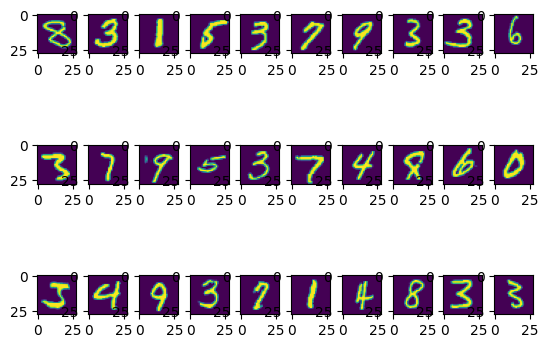

In [11]:
images, labels = next(iter(train_data))

for i in range(1, 31):
    plt.subplot(3,10, i)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze())

# Decide the Number of Layers and Their Sizes

In [12]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10

# Build a Model

In [13]:
model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))

# Calculate Cross-Entropy Loss

In [14]:
images = images.view(images.shape[0], -1)
outputs = model(images)
lossFunction = nn.CrossEntropyLoss()
loss = lossFunction(outputs, labels)

* Calculating the loss with the untrained model gives you an idea of how far off the predictions are before any training has occurred. It's like a starting point, showing how much improvement is needed.

* Let’s break down the first and second lines:

1. **`images = images.view(images.shape[0], -1)`**:
    - This reshapes (flattens) the **images** from a 2D format (28x28 pixels) into a 1D vector of 784 values.
    - **`images.shape[0]`**: This keeps the batch size the same (e.g., 64 images).
    - **`1`**: The `1` automatically calculates the rest, flattening the 28x28 image into a single 784-element vector.
    
    So, you're flattening each image to a 1D vector so it can be fed into the neural network.
    
2. **`outputs = model(images)`**:
    - This line passes the flattened **images** through the model to get the **predictions** (outputs).
    - The model generates predictions for each image in the batch, corresponding to the likelihood of each digit (0–9).



# Obtain the Stochastic Gradient Descent Optimizer

In [15]:
gradient_descent = optim.SGD(model.parameters(), lr=0.1)

The reason **Stochastic Gradient Descent (SGD)** is used instead of regular **Gradient Descent (GD)** is because it’s faster and more efficient, especially for large datasets.

Here’s why:

1. **Regular Gradient Descent**:
    - It calculates the gradient using **all data points** in the dataset before updating the model's parameters.
    - This can be **slow and computationally expensive**, especially for large datasets.
2. **Stochastic Gradient Descent (SGD)**:
    - It updates the model's parameters using **one data point (or a small batch)** at a time.
    - This means it **updates more frequently**, which can lead to faster training and less memory usage.
    * To set up **stochastic gradient descent (SGD)**, you use `torch.optim.SGD` to adjust the model's parameters (weights and biases) during training.

- **`model.parameters()`**: This fetches the weights and biases of the model that need to be optimized.
- **`lr=0.1`**: This is the **learning rate**, controlling how much the parameters are adjusted at each step.

# Train the Model

In [16]:
epochs = 20
for epoch in range(epochs):  # Outer loop (Epochs)
    running_loss = 0.0  # Reset running loss for each epoch

    for images, labels in train_data:  # Inner loop (Batches)
        images = images.view(images.shape[0], -1)  # Flatten images

        gradient_descent.zero_grad()  # Reset gradients
        loss = lossFunction(model(images), labels)  # Feed-forward (calculate loss)

        loss.backward()  # Backpropagation (calculate gradients)
        gradient_descent.step()  # Optimize (update weights)

        running_loss += loss.item() * images.size(0)  # Accumulate running loss

    epoch_loss = running_loss / len(labels)  # Calculate average loss for the epoch
    print("Iteration : ", epoch+1, end = "\\t")  # Print the current epoch number
    print("Loss: ", epoch_loss)  # Print the loss for this epoch


Iteration :  1\tLoss:  919.1807991713285
Iteration :  2\tLoss:  375.2954313829541
Iteration :  3\tLoss:  280.57742525078356
Iteration :  4\tLoss:  234.295208000578
Iteration :  5\tLoss:  202.85215607471764
Iteration :  6\tLoss:  180.26899672765285
Iteration :  7\tLoss:  160.1941795074381
Iteration :  8\tLoss:  148.21056788461283
Iteration :  9\tLoss:  137.29237508680671
Iteration :  10\tLoss:  127.17633334337734
Iteration :  11\tLoss:  117.03794291941449
Iteration :  12\tLoss:  105.81287167663686
Iteration :  13\tLoss:  100.24116611783393
Iteration :  14\tLoss:  97.59690270177089
Iteration :  15\tLoss:  90.70603707642294
Iteration :  16\tLoss:  86.36593264818657
Iteration :  17\tLoss:  78.21863547380781
Iteration :  18\tLoss:  75.80282274144702
Iteration :  19\tLoss:  68.21777221385855
Iteration :  20\tLoss:  68.68284696495539


# Get the Predicted Label

In [18]:
# Method to get the predicted label from the model
def get_predicted_label(image):
    image = image.view(1, 28*28)  # Reshape the image to match the input format
    with torch.no_grad():  # No gradient calculation (just prediction)
        prediction_score = model(image)  # Get prediction scores from the model
    return np.argmax(prediction_score)  # Return the label with the highest score

# Test the method with a single image
images, labels = next(iter(test_data))  # Get a batch of test images and labels
print("Predicted Label: ", get_predicted_label(images[0]))  # Predict label for the first image
print("Actual Label: ", labels.numpy()[0])  # Print the actual label for the first image


Predicted Label:  tensor(5)
Actual Label:  5


- **`get_predicted_label()`**: Reshapes an image, gets the prediction from the model, and returns the predicted label.
- **`np.argmax()`**: Picks the highest score (the most likely digit) from the model’s prediction.
- **Test the function**: Compares the model's predicted label with the actual label from the dataset.

# Test the Model

In [19]:
totalCount = 0  # Total number of images in the test set
accurateCount = 0  # Number of correct predictions

# Loop through batches of images and labels from the test data
for images, labels in test_data:
    # Loop through each image in the batch
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])  # Predict the label for the image
        actualLabel = labels.numpy()[i]  # Get the actual label

        # Print the predicted and actual labels for each image
        print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)

        # Check if the prediction is correct
        if predictedLabel == actualLabel:
            accurateCount += 1  # Increment the count if the prediction is correct

    # Keep track of the total number of images
    totalCount += len(labels)

# Print the results
print("Total images tested: ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", (accurateCount / totalCount) * 100, "%")


Streaming output truncated to the last 5000 lines.
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(5)  / Actual

# Final Accuracy

In [20]:
# Print the results
print("Total images tested: ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", (accurateCount / totalCount) * 100, "%")


Total images tested:  10000
Accurate predictions:  9733
Accuracy percentage:  97.33000000000001 %


That's an excellent result! 🎉 Your model has an accuracy of 97.33%, which means it correctly predicted the handwritten digits for 9,733 out of 10,000 images. This is a high level of accuracy, indicating that your deep neural network is performing really well in recognizing handwritten digits from the MNIST dataset.